In [178]:
#Импорт библиотек 
#from google.colab import drive
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from prettytable import PrettyTable
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score

In [175]:
#Монтирую гугл диск, чтобы взять оттуда датасет
#drive.mount("/Desktop", force_remount=True)

In [68]:
#Загружаю данные с гугл диска
data = pd.read_csv('Desktop/AppleStore.csv', sep=",")

# Описание выбранного датасета
Для выполнения курсовой работы я выбрала датасет "Mobile App Statistics (Apple iOS app store)"
https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/downloads/app-store-apple-data-set-10k-apps.zip/7
Постоянно меняющийся мобильный ландшафт - это сложное пространство для навигации. Процент мобильных относительно стационарных только растет. Android занимает около 53,2% рынка смартфонов, а iOS - 43%. Чтобы заставить больше людей загружать ваше приложение, вам нужно убедиться, что они могут легко найти ваше приложение. Аналитика мобильных приложений - отличный способ понять существующую стратегию, способствующую росту и удержанию будущего пользователя. В настоящее время с миллионами приложений следующий набор данных стал очень важным для получения самых популярных приложений в магазине приложений iOS. Этот набор данных содержит более 7000 деталей мобильного приложения Apple iOS. Данные были извлечены из API поиска iTunes на веб-сайте Apple Inc. Для этого исследования использовались R и Linux инструменты для утилизации.

Датасет содержит следующие поля:

"id" : ID приложения
"track_name": название приложения
"size_bytes": размер в байтах
"currency": тип валюты
"price": цена
"rating_count_tot": счетчик оценок пользователей (для всех версий)
"rating_count_ver": счетчик оценок пользователей (для текущей версии)
"user_rating" : среднее значение оценок пользователей (для всех версий)
"user_rating_ver": среднее значение оценок пользователей (для текущей версии)
"ver" : код последней версии
"cont_rating": рейтинг контента

"sup_devices.num": число поддерживаемых устройств
"ipadSc_urls.num": количество отображаемых снимков экрана
"lang.num": число поддерживаемых языков
"vpp_lic": лицензирование обработки вектрных пакетов на основе устройств включено

"prime_genre": основной жанр. Я выбрала его целевым признаком.

In [69]:
data.head(5)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [70]:
data.shape

(7197, 17)

In [71]:
data.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

In [72]:
data.isnull().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [73]:
print(data['price'].unique(), data['user_rating'].unique(), data['prime_genre'].unique(),
data['lang.num'].unique())

[  3.99   0.     0.99   9.99   4.99   7.99   2.99   1.99   5.99  12.99
  21.99 249.99   6.99  74.99  19.99   8.99  24.99  13.99  14.99  16.99
  47.99  11.99  59.99  15.99  27.99  17.99 299.99  49.99  23.99  20.99
  39.99  99.99  29.99  34.99  18.99  22.99] [4.  3.5 4.5 5.  3.  2.  2.5 0.  1.5 1. ] ['Games' 'Productivity' 'Weather' 'Shopping' 'Reference' 'Finance' 'Music'
 'Utilities' 'Travel' 'Social Networking' 'Sports' 'Business'
 'Health & Fitness' 'Entertainment' 'Photo & Video' 'Navigation'
 'Education' 'Lifestyle' 'Food & Drink' 'News' 'Book' 'Medical' 'Catalogs'] [10 23  3  9 45  1 19 11  6 33  2 26 29 18 16 15  5 21 12  7 30 13  8  0
  4 43 17 32 28 35 14 36 20 22 31 34 40 41 25 59 56 27 24 46 47 37 42 55
 39 54 58 69 63 75 50 68 74]


In [190]:
#y.ravel().shape == (n_samples, )
le = LabelEncoder()
data['price'] = le.fit_transform(data[['price']])
data['user_rating'] = le.fit_transform(data[['user_rating']])
data['prime_genre'] = le.fit_transform(data[['prime_genre']])
data['lang.num'] = le.fit_transform(data[['lang.num']])

/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array w

In [75]:
print(data['price'].unique(), data['user_rating'].unique(), data['prime_genre'].unique(),
data['lang.num'].unique())

[ 4  0  1 10  5  8  3  2  6 12 21 34  7 32 19  9 24 13 14 16 29 11 31 15
 25 17 35 30 23 20 28 33 26 27 18 22] [7 6 8 9 5 3 4 0 2 1] [ 7 15 22 17 16  5 11 21 20 18 19  1  8  4 14 12  3  9  6 13  0 10  2] [10 23  3  9 43  1 19 11  6 33  2 26 29 18 16 15  5 21 12  7 30 13  8  0
  4 42 17 32 28 35 14 36 20 22 31 34 39 40 25 51 49 27 24 44 45 37 41 48
 38 47 50 54 52 56 46 53 55]


In [76]:
data.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price                 int64
rating_count_tot      int64
rating_count_ver      int64
user_rating           int64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre           int64
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

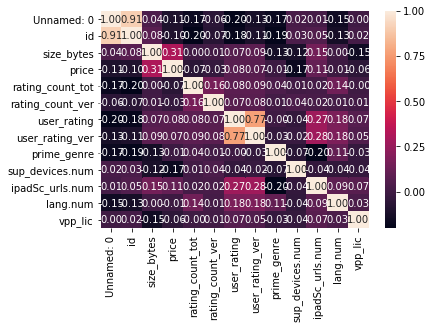

In [77]:
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f', square=False)

In [78]:
data.corr()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
Unnamed: 0,1.000000,0.910714,0.041277,-0.107082,-0.168640,-0.064717,-0.200994,-0.127580,-0.168304,0.024648,0.014589,-0.153221,0.000501
id,0.910714,1.000000,0.077486,-0.103253,-0.201976,-0.072784,-0.180121,-0.109849,-0.189421,0.033605,0.052082,-0.133892,0.017743
size_bytes,0.041277,0.077486,1.000000,0.314092,0.004486,0.006337,0.067561,0.086075,-0.134438,-0.118347,0.152697,0.004469,-0.150418
price,-0.107082,-0.103253,0.314092,1.000000,-0.069095,-0.030415,0.079283,0.074985,-0.010951,-0.165637,0.108289,-0.008022,-0.057497
rating_count_tot,-0.168640,-0.201976,0.004486,-0.069095,1.000000,0.163645,0.084285,0.088744,0.039188,0.008832,0.015734,0.141071,-0.000982
rating_count_ver,-0.064717,-0.072784,0.006337,-0.030415,0.163645,1.000000,0.070645,0.077840,0.011090,0.037951,0.024333,0.014075,0.006460
user_rating,-0.200994,-0.180121,0.067561,0.079283,0.084285,0.070645,1.000000,0.773006,-0.003993,-0.038326,0.267674,0.175133,0.069695
user_rating_ver,-0.127580,-0.109849,0.086075,0.074985,0.088744,0.077840,0.773006,1.000000,-0.033246,-0.018901,0.275737,0.178548,0.050094
prime_genre,-0.168304,-0.189421,-0.134438,-0.010951,0.039188,0.011090,-0.003993,-0.033246,1.000000,-0.073675,-0.198290,0.105897,-0.028522
sup_devices.num,0.024648,0.033605,-0.118347,-0.165637,0.008832,0.037951,-0.038326,-0.018901,-0.073675,1.000000,-0.037728,-0.043139,-0.037109


In [106]:
cols_x = ['size_bytes', 'price', 'rating_count_tot', 'user_rating', 
          'sup_devices.num', 'ipadSc_urls.num',
          'lang.num', 'vpp_lic', ]   
# целевой признак
col_y = 'prime_genre'
#разделение данных
X_train, X_test, y_train, y_test = train_test_split(data[cols_x][0:50000], data[col_y][0:50000], test_size = 0.5, random_state = 11)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print (N_train, N_test)

3598 3599


# Функция перевода предсказанного признака в бинарный

In [107]:
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res

In [108]:
# Если целевой признак == справка, 
# то будем считать этот случай 1 в бинарном признаке
bin_y_test = convert_target_to_binary(y_test, 'Reference')
list(zip(y_test, bin_y_test))[0:15]

[(22, 0),
 (7, 0),
 (7, 0),
 (7, 0),
 (15, 0),
 (4, 0),
 (7, 0),
 (7, 0),
 (7, 0),
 (21, 0),
 (7, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (7, 0)]

# Модели без подобранных параметров

## К-ближайших соседей

In [109]:
KNeighborsClassifierObj = KNeighborsClassifier(n_neighbors = 3)

In [110]:
KNeighborsClassifierObj.fit(X_train, y_train)
target_knei = KNeighborsClassifierObj.predict(X_test)

In [111]:
# Конвертация предсказанных признаков
bin_target_knei = convert_target_to_binary(target_knei, 'Reference')

In [112]:
ac_knei = accuracy_score(y_test, target_knei)
bas_knei = balanced_accuracy_score(bin_y_test, bin_target_knei)
rec_knei = recall_score(bin_y_test, bin_target_knei)
print('''accuracy_score: {0}
balanced_accuracy_score: {1}
recall_score: {2}'''.format(ac_knei, bas_knei, rec_knei))

accuracy_score: 0.405668241178105
balanced_accuracy_score: 1.0
recall_score: 0.0


# Градиентный спуск 

In [179]:
grad = SGDClassifier().fit(X_train, y_train)
target_grad = grad.predict(X_test)

/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [114]:
#Конвертация предсказанных признаков
bin_target_grad = convert_target_to_binary(target_grad, 'Reference')

In [115]:
ac_grad = accuracy_score(y_test, target_grad)
bas_grad = balanced_accuracy_score(bin_y_test, bin_target_grad)
rec_grad = recall_score(bin_y_test, bin_target_grad)
print('''accuracy_score: {0}
balanced_accuracy_score: {1}
recall_score: {2}'''.format(ac_grad, bas_grad, rec_grad))

accuracy_score: 0.5298694081689358
balanced_accuracy_score: 1.0
recall_score: 0.0


# Дерево принятия решений

In [116]:
dtcl = DecisionTreeClassifier().fit(X_train, y_train)
target_dtc = dtcl.predict(X_test)

In [117]:
# Конвертация предсказанных признаков
bin_target_dtc = convert_target_to_binary(target_dtc, 'Reference')

In [118]:
ac_dtc = accuracy_score(y_test, target_dtc)
bas_dtc = balanced_accuracy_score(bin_y_test, bin_target_dtc)
rec_dtc = recall_score(bin_y_test, bin_target_dtc)
print('''accuracy_score: {0}
balanced_accuracy_score: {1}
recall_score: {2}'''.format(ac_dtc, bas_dtc, rec_dtc))

accuracy_score: 0.4609613781606002
balanced_accuracy_score: 1.0
recall_score: 0.0


# Модель бэггинга

In [119]:
bag = BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=10).fit(X_train, y_train)
target_bag = bag.predict(X_test)

In [120]:
# Конвертация предсказанных признаков
bin_target_bag = convert_target_to_binary(target_bag, 'Reference')

In [121]:
ac_bag = accuracy_score(y_test, target_bag)
bas_bag = balanced_accuracy_score(bin_y_test, bin_target_bag)
rec_bag = recall_score(bin_y_test, bin_target_bag)
print('''accuracy_score: {0}
balanced_accuracy_score: {1}
recall_score: {2}'''.format(ac_bag, bas_bag, rec_bag))

accuracy_score: 0.5212559044178938
balanced_accuracy_score: 1.0
recall_score: 0.0


# Случайный лес

In [180]:
forest = RandomForestClassifier(random_state=1, max_features = 2).fit(X_train, y_train)
target_forest = forest.predict(X_test)

/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [123]:
# Конвертация предсказанных признаков
bin_target_forest = convert_target_to_binary(target_forest, 'Reference')

In [124]:
ac_forest = accuracy_score(y_test, target_forest)
bas_forest = balanced_accuracy_score(bin_y_test, bin_target_forest)
rec_forest = recall_score(bin_y_test, bin_target_forest)
print('''accuracy_score: {0}
balanced_accuracy_score: {1}
recall_score: {2}'''.format(ac_forest, bas_forest, rec_forest))

accuracy_score: 0.5268130036121145
balanced_accuracy_score: 1.0
recall_score: 0.0


# Подбор гиперпараметров с использованием GridSearchCV и кросс-валидации

## K- ближайших соседей

In [125]:
n_range_knei = np.array(range(1,30,1))
tuned_parameters_knei = [{'n_neighbors': n_range_knei}]
tuned_parameters_knei

[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}]

In [134]:
knei_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters_knei, cv=KFold(n_splits=5), scoring= 'accuracy')
knei_gs.fit(data[cols_x][0:7196], data[col_y][0:7196])

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [135]:
knei_gs.best_params_

{'n_neighbors': 29}

## Обучение с подобранным параметром

In [136]:
knei_gs.best_estimator_.fit(X_train, y_train)
target_knei_gs = knei_gs.best_estimator_.predict(X_test)

## Проверка качества модели

In [137]:
# Конвертация предсказанных признаков
bin_target_knei_gs = convert_target_to_binary(target_knei_gs, 'Reference')

In [138]:
ac_knei_gs = accuracy_score(y_test, target_knei_gs)
bas_knei_gs = balanced_accuracy_score(bin_y_test, bin_target_knei_gs)
rec_knei_gs = recall_score(bin_y_test, bin_target_knei_gs)
print('''accuracy_score          с gs: {0}, без gs: {3}
balanced_accuracy_score с gs: {1}, без gs: {4}
recall_score            с gs: {2}, без gs: {5}'''.format(round(ac_knei_gs,3), 
round(bas_knei_gs, 3), round(rec_knei_gs, 3), round(ac_knei, 3), 
round(bas_knei, 3), round(rec_knei, 3)))

accuracy_score          с gs: 0.526, без gs: 0.406
balanced_accuracy_score с gs: 1.0, без gs: 1.0
recall_score            с gs: 0.0, без gs: 0.0


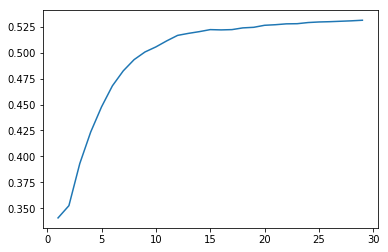

In [139]:
# Изменение качества на обучающей выборке
plt.plot(n_range_knei, knei_gs.cv_results_['mean_test_score'])

## Градиентный спуск

In [140]:
n_range_grad = np.array(np.arange(0.0001,1,0.05))
tuned_parameters = [{'alpha': n_range_grad}]
tuned_parameters

[{'alpha': array([1.000e-04, 5.010e-02, 1.001e-01, 1.501e-01, 2.001e-01, 2.501e-01,
         3.001e-01, 3.501e-01, 4.001e-01, 4.501e-01, 5.001e-01, 5.501e-01,
         6.001e-01, 6.501e-01, 7.001e-01, 7.501e-01, 8.001e-01, 8.501e-01,
         9.001e-01, 9.501e-01])}]

In [143]:
grad_gs = GridSearchCV(SGDClassifier(), tuned_parameters, cv=KFold(n_splits=5), scoring='accuracy')
grad_gs.fit(data[cols_x][0:1000], data[col_y][0:1000])
grad_gs.best_params_

/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are l

/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are l

/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are l

{'alpha': 0.2501}

## Обучение с подобранным параметром

In [144]:
grad_gs.best_estimator_.fit(X_train, y_train)
target_grad_gs = grad_gs.best_estimator_.predict(X_test)

/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


## Проверка качества модели

In [145]:
# Конвертация предсказанных признаков
bin_target_grad_gs = convert_target_to_binary(target_grad_gs, 'Reference')

In [146]:
ac_grad_gs = accuracy_score(y_test, target_grad_gs)
bas_grad_gs = balanced_accuracy_score(bin_y_test, bin_target_grad_gs)
rec_grad_gs = recall_score(bin_y_test, bin_target_grad_gs)
print('''accuracy_score          с gs: {0}, без gs: {3}
balanced_accuracy_score с gs: {1}, без gs: {4}
recall_score            с gs: {2}, без gs: {5}'''.format(round(ac_grad_gs,3), 
round(bas_grad_gs, 3), round(rec_grad_gs, 3), round(ac_grad, 3), 
round(bas_grad, 3), round(rec_grad, 3)))

accuracy_score          с gs: 0.53, без gs: 0.53
balanced_accuracy_score с gs: 1.0, без gs: 1.0
recall_score            с gs: 0.0, без gs: 0.0


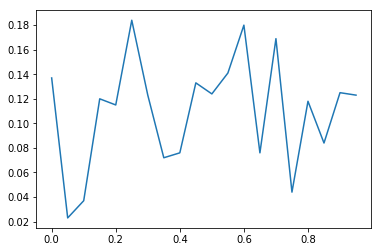

In [147]:
# Изменение качества на обучающей выборке
plt.plot(n_range_grad, grad_gs.cv_results_['mean_test_score'])

## Дерево принятия решений

In [148]:
n_range_dtc = np.array(range(1,1000,30))
tuned_parameters_dtc = [{'max_depth': n_range_dtc}]
tuned_parameters_dtc

[{'max_depth': array([  1,  31,  61,  91, 121, 151, 181, 211, 241, 271, 301, 331, 361,
         391, 421, 451, 481, 511, 541, 571, 601, 631, 661, 691, 721, 751,
         781, 811, 841, 871, 901, 931, 961, 991])}]

In [150]:
dtc_gs = GridSearchCV(DecisionTreeClassifier(), tuned_parameters_dtc, cv=KFold(n_splits=10), scoring= 'accuracy')
dtc_gs.fit(data[cols_x][0:7196], data[col_y][0:7196])
dtc_gs.best_params_

{'max_depth': 1}

## Обучение с подобранным параметром

In [151]:
dtc_gs.best_estimator_.fit(X_train, y_train)
target_dtc_gs = dtc_gs.best_estimator_.predict(X_test)

## Проверка качества модели

In [152]:
# Конвертация предсказанных признаков
bin_target_dtc_gs = convert_target_to_binary(target_dtc_gs, 'Reference')

In [153]:
ac_dtc_gs = accuracy_score(y_test, target_dtc_gs)
bas_dtc_gs = balanced_accuracy_score(bin_y_test, bin_target_dtc_gs)
rec_dtc_gs = recall_score(bin_y_test, bin_target_dtc_gs)
print('''accuracy_score          с gs: {0}, без gs: {3}
balanced_accuracy_score с gs: {1}, без gs: {4}
recall_score            с gs: {2}, без gs: {5}'''.format(round(ac_dtc_gs,3), 
round(bas_dtc_gs, 3), round(rec_dtc_gs, 3), round(ac_dtc, 3), 
round(bas_dtc, 3), round(rec_dtc, 3)))

accuracy_score          с gs: 0.53, без gs: 0.461
balanced_accuracy_score с gs: 1.0, без gs: 1.0
recall_score            с gs: 0.0, без gs: 0.0


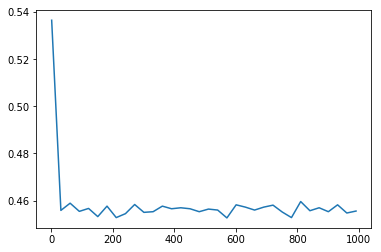

In [154]:
# Изменение качества на обучающей выборке
plt.plot(n_range_dtc, dtc_gs.cv_results_['mean_test_score'])

## Модель бэггинга

In [159]:
n_range_bag = np.array(range(1,202,10))
tuned_parameters = [{'n_estimators': n_range_bag}]
tuned_parameters

[{'n_estimators': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
         131, 141, 151, 161, 171, 181, 191, 201])}]

In [161]:
bag_gs = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), tuned_parameters, cv=KFold(n_splits=5), scoring='accuracy')
bag_gs.fit(data[cols_x][0:5000], data[col_y][0:5000])
bag_gs.best_params_

{'n_estimators': 191}

## Обучение с подобранным параметром

In [162]:
bag_gs.best_estimator_.fit(X_train, y_train)
target_bag_gs = bag_gs.best_estimator_.predict(X_test)

## Проверка качества модели

In [163]:
# Конвертация предсказанных признаков
bin_target_bag_gs = convert_target_to_binary(target_bag_gs, 'Games')

In [164]:
ac_bag_gs = accuracy_score(y_test, target_bag_gs)
bas_bag_gs = balanced_accuracy_score(bin_y_test, bin_target_bag_gs)
rec_bag_gs = recall_score(bin_y_test, bin_target_bag_gs)
print('''accuracy_score          с gs: {0}, без gs: {3}
balanced_accuracy_score с gs: {1}, без gs: {4}
recall_score            с gs: {2}, без gs: {5}'''.format(round(ac_bag_gs,3), 
round(bas_bag_gs, 3), round(rec_bag_gs, 3), round(ac_bag, 3), 
round(bas_bag, 3), round(rec_bag, 3)))

accuracy_score          с gs: 0.536, без gs: 0.521
balanced_accuracy_score с gs: 1.0, без gs: 1.0
recall_score            с gs: 0.0, без gs: 0.0


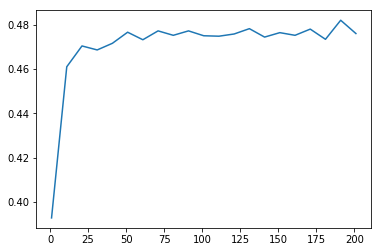

In [165]:
# Изменение качества на обучающей выборке
plt.plot(n_range_bag, bag_gs.cv_results_['mean_test_score'])

## Случайный лес

In [166]:
n_range_forest = np.array(range(1,1000,30))
tuned_parameters_forest = [{'max_depth': n_range_forest}]
tuned_parameters_forest

[{'max_depth': array([  1,  31,  61,  91, 121, 151, 181, 211, 241, 271, 301, 331, 361,
         391, 421, 451, 481, 511, 541, 571, 601, 631, 661, 691, 721, 751,
         781, 811, 841, 871, 901, 931, 961, 991])}]

In [181]:
forest_gs = GridSearchCV(RandomForestClassifier(), tuned_parameters_forest, cv=KFold(n_splits=5), scoring='accuracy')
forest_gs.fit(data[cols_x][0:10000], data[col_y][0:10000])
forest_gs.best_params_

/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/margarita/anaconda3/l

/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/margarita/anaconda3/l

/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/margarita/anaconda3/l

/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/margarita/anaconda3/l

/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/margarita/anaconda3/l

{'max_depth': 1}

### Обучение с подобранным параметром

In [168]:
forest_gs.best_estimator_.fit(X_train, y_train)
target_forest_gs = bag_gs.best_estimator_.predict(X_test)

### Проверка качества модели

In [169]:
# Конвертация предсказанных признаков
bin_target_forest_gs = convert_target_to_binary(target_forest_gs, 'Games')

In [170]:
ac_forest_gs = accuracy_score(y_test, target_forest_gs)
bas_forest_gs = balanced_accuracy_score(bin_y_test, bin_target_forest_gs)
rec_forest_gs = recall_score(bin_y_test, bin_target_forest_gs)
print('''accuracy_score          с gs: {0}, без gs: {3}
balanced_accuracy_score с gs: {1}, без gs: {4}
recall_score            с gs: {2}, без gs: {5}'''.format(round(ac_forest_gs,3), 
round(bas_forest_gs, 3), round(rec_forest_gs, 3), round(ac_forest, 3), 
round(bas_forest, 3), round(rec_forest, 3)))

accuracy_score          с gs: 0.536, без gs: 0.527
balanced_accuracy_score с gs: 1.0, без gs: 1.0
recall_score            с gs: 0.0, без gs: 0.0


In [182]:
x = PrettyTable()
x.field_names = ["Model", "accuracy_score", "balanced_accuracy_score", "recall_score"]

In [183]:
x.add_row(["K-соседей GS", round(ac_knei_gs,3), round(bas_knei_gs, 3), 
           round(rec_knei_gs, 3)])
x.add_row(["к-соседей без GS", round(ac_knei, 3), round(bas_knei, 3), 
           round(rec_knei, 3)])
x.add_row(["Градиентный спуск GS", round(ac_grad_gs,3), round(bas_grad_gs, 3), 
           round(rec_grad_gs, 3)])
x.add_row(["Градиентный спуск без GS", round(ac_grad, 3), round(bas_grad, 3), 
              round(rec_grad, 3)])
x.add_row(["Дерево принятия решений GS", round(ac_dtc_gs,3), round(bas_dtc_gs, 3), 
           round(rec_dtc_gs, 3)])
x.add_row(["Дерево принятия решений без GS", round(ac_dtc, 3), 
          round(bas_dtc, 3), round(rec_dtc, 3)])
x.add_row(["Модель бэггинга GS", round(ac_bag_gs,3), round(bas_bag_gs, 3), 
           round(rec_bag_gs, 3)])
x.add_row(["Модель бэггинга без GS", round(ac_bag, 3), round(bas_bag, 3), 
           round(rec_bag, 3)])
x.add_row(["Случайный лес GS", round(ac_forest_gs,3), round(bas_forest_gs, 3), 
           round(rec_forest_gs, 3)])
x.add_row(["Случайный лес без GS", round(ac_forest, 3), 
round(bas_forest, 3), round(rec_forest, 3)])

In [184]:
print(x)

+--------------------------------+----------------+-------------------------+--------------+
|             Model              | accuracy_score | balanced_accuracy_score | recall_score |
+--------------------------------+----------------+-------------------------+--------------+
|          K-соседей GS          |     0.526      |           1.0           |     0.0      |
|        к-соседей без GS        |     0.406      |           1.0           |     0.0      |
|      Градиентный спуск GS      |      0.53      |           1.0           |     0.0      |
|    Градиентный спуск без GS    |      0.53      |           1.0           |     0.0      |
|   Дерево принятия решений GS   |      0.53      |           1.0           |     0.0      |
| Дерево принятия решений без GS |     0.461      |           1.0           |     0.0      |
|       Модель бэггинга GS       |     0.536      |           1.0           |     0.0      |
|     Модель бэггинга без GS     |     0.521      |           1.0     